## Testing Bandit Algorithms

In [1]:
# Run this script to add the src directory to the python path

from notebook_utils import modify_sys_path, get_src_dir_path

modify_sys_path()

In [52]:
from src.bandit import ButtonsBandit
from src.bandit_algorithms import UCB_Algorithm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [97]:
num_arms = 5
gap = 0.2
c = 1.0
num_steps = 200
seed = 2

bandit = ButtonsBandit(num_arms=num_arms, gap=gap, seed=seed)
ucb = UCB_Algorithm(num_arms=num_arms, c=1.0)

In [98]:
print("Optimal arm:", bandit.best_arm)

Optimal arm: 4


In [99]:
cumulative_regret = 0
cumulative_regret_list = []
counts_list = []
values_list = []

for step in range(num_steps):
    action = ucb.select_arm()
    reward = bandit.get_reward(action)
    ucb.update(action, reward)
    regret = bandit.get_optimal_mean_reward() - reward
    cumulative_regret += regret
    # print(f"Step {step + 1}: Action: {action}, Reward: {reward}, Cumulative Regret: {cumulative_regret}")
    cumulative_regret_list.append(cumulative_regret)
    counts_list.append(ucb.counts.copy())
    values_list.append(ucb.values.copy())


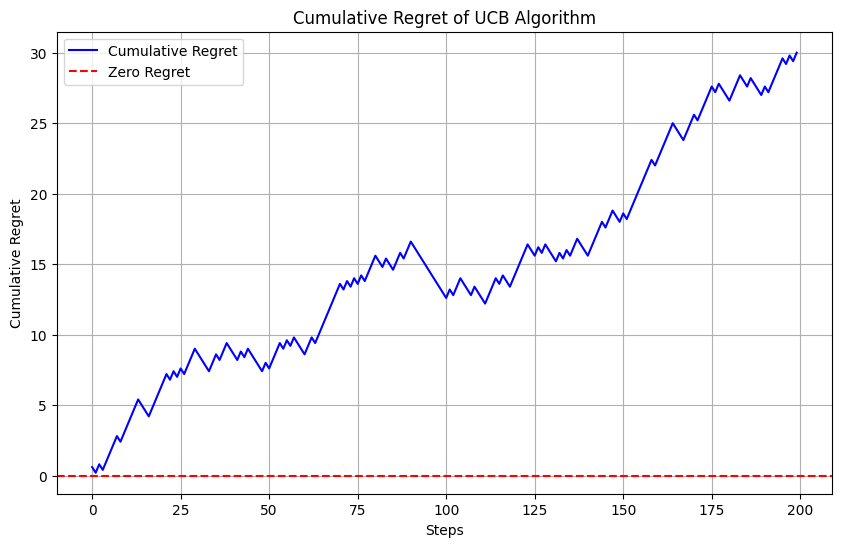

In [100]:
# Plotting the cumulative regret

plt.figure(figsize=(10, 6))
plt.plot(cumulative_regret_list, label='Cumulative Regret', color='blue')
plt.xlabel('Steps')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret of UCB Algorithm')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Regret')
plt.legend()
plt.grid()

<Figure size 1000x600 with 0 Axes>

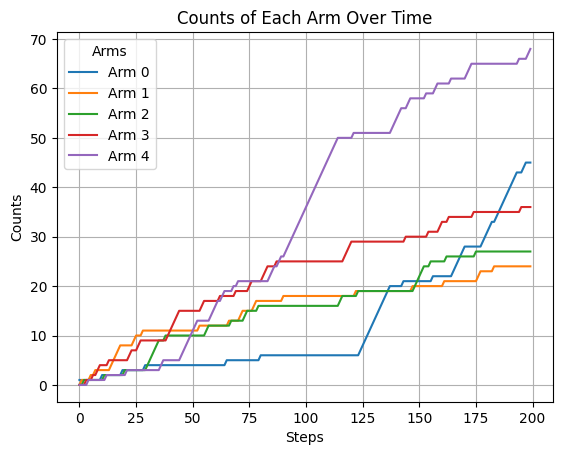

In [101]:
# Plot counts of each arm over time

plt.figure(figsize=(10, 6))
arm_counts_df = pd.DataFrame(counts_list)
arm_counts_df.columns = [f'Arm {i}' for i in range(num_arms)]
arm_counts_df.plot(title='Counts of Each Arm Over Time', xlabel='Steps', ylabel='Counts')
plt.legend(title='Arms')
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

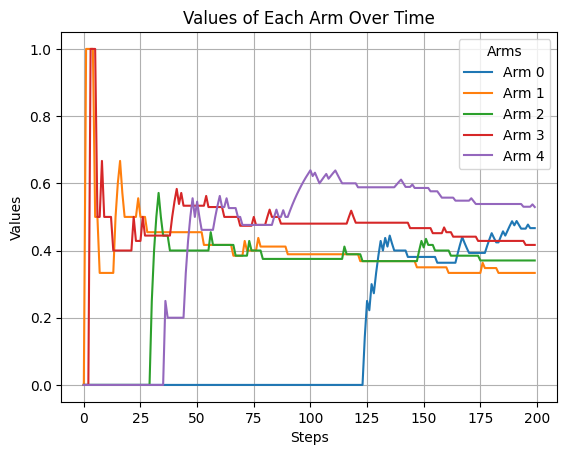

In [102]:
# Plot values of each arm over time

plt.figure(figsize=(10, 6))
arm_values_df = pd.DataFrame(values_list)
arm_values_df.columns = [f'Arm {i}' for i in range(num_arms)]
arm_values_df.plot(title='Values of Each Arm Over Time', xlabel='Steps', ylabel='Values')
plt.legend(title='Arms')
plt.grid()